In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
from pandas.tseries.offsets import BDay
import seaborn; seaborn.set()

In [31]:
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)

/tmp/ipykernel_35284/537977294.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)


In [32]:
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [33]:
data.head(0)

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,


In [34]:
data.drop('Fremont Bridge Sidewalks, south of N 34th St', axis=1, inplace=True)

In [35]:
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,
2012-10-02 13:00:00,7.0,48.0
2012-10-02 14:00:00,55.0,75.0
2012-10-02 15:00:00,81.0,71.0
2012-10-02 16:00:00,167.0,111.0
2012-10-02 17:00:00,393.0,170.0


In [36]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [37]:
data.dropna().describe()

,West,East,Total
count,100735.000000,100735.000000,100735.000000
mean,45.553373,59.799454,105.352827
std,60.090291,81.591238,131.840748
min,0.000000,0.000000,0.000000
25%,5.000000,7.000000,13.000000
50%,25.000000,32.000000,59.000000
75%,62.000000,78.000000,143.000000
max,667.000000,850.000000,1097.000000


Text(0, 0.5, 'Hourly Bicycle Count')

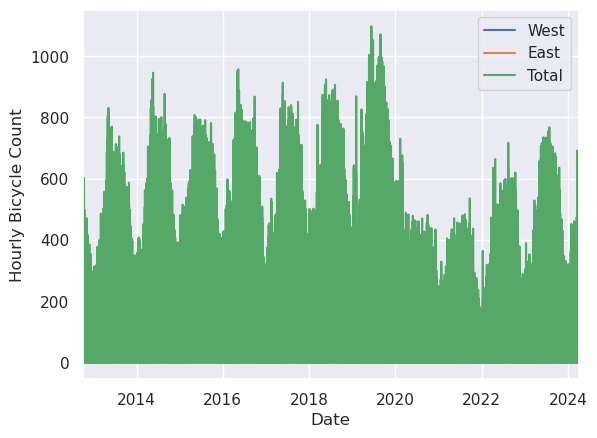

In [38]:
#Visualizing the data
data.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0, 0.5, 'weekly bicycle count')

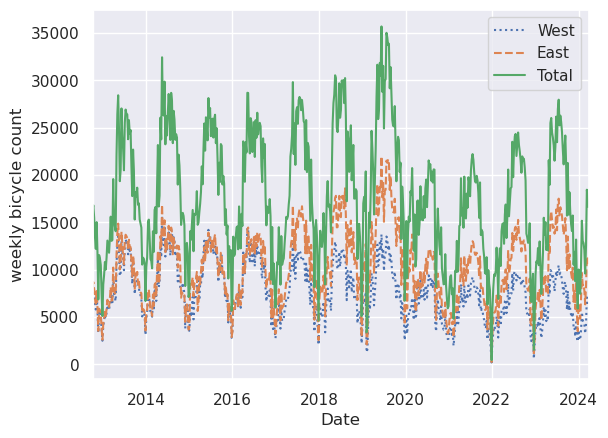

In [39]:
#Resample by week
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('weekly bicycle count')

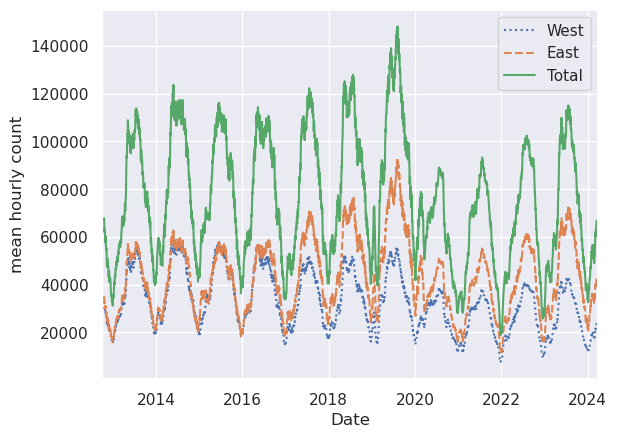

In [40]:
#Aggregation: Rolling mean(30-day rolling mean)
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

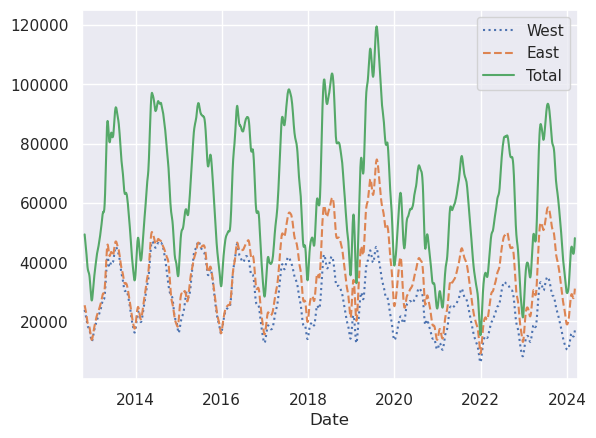

In [44]:
#Getting a smoother version of the rolling mean
#By applying the Gaussian Window
daily.rolling(50, center=True,
             win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

<Axes: xlabel='time'>

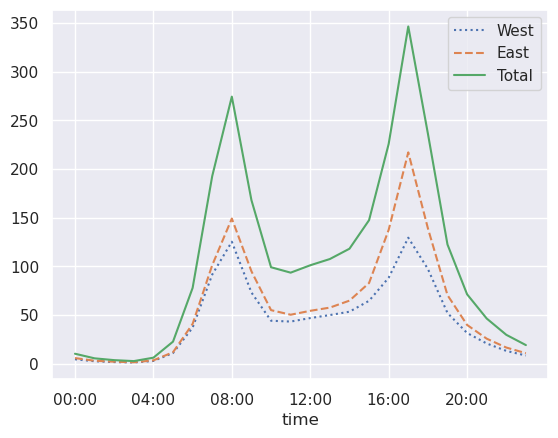

In [45]:
#average traffic as a function of the time of day
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

<Axes: >

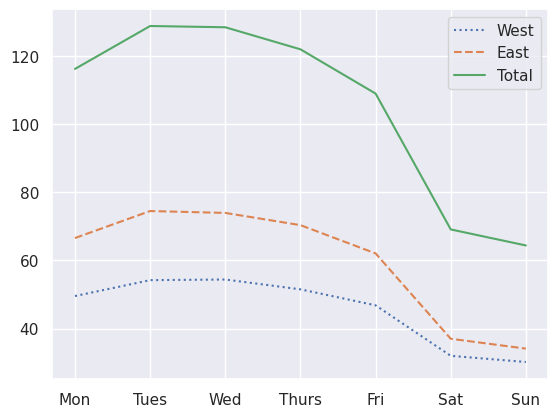

In [46]:
#How counts change, based on day of the week
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

In [47]:
#Hourly trends on weekdays versus weekends (Compund groupby)
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

<Axes: title={'center': 'Weekends'}, xlabel='time'>

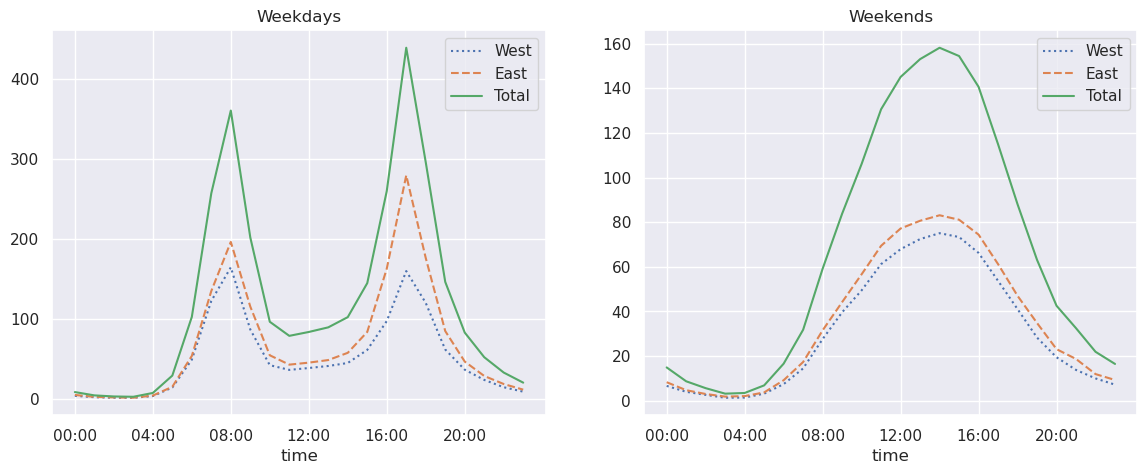

In [51]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                          xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                          xticks=hourly_ticks, style=[':', '--', '-'])